In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [88]:
df = pd.read_excel(r'C:\Users\kdelfino\Documents\GitHub\PM2_Lineup_Dashboard\PM2-LINEUP-DASHBOARD\PM2 SCHEDULER.xlsx')

In [89]:
# Check data
df.head()

,Full Roster,AKA,05-01-24-A,05-01-24-B,05-01-24-C,05-02-24-A,05-02-24-B,05-02-24-C,05-03-24-A,05-03-24-B,...,05-18-24-C,05-23-24-A,05-23-24-B,05-23-24-C,05-24-24-A,05-24-24-B,05-24-24-C,05-25-24-A,05-25-24-B,05-25-24-C
0,Ali Ronsom,Ali,POST-LACE,ROUTING,ROUTING,ROUTING,PRE-ALR,POST-LACE,NaN,NaN,...,NaN,POST-LACE,ROUTING,POST-LACE,ROUTING,BLOCKER 2,POST-LACE,ROUTING,POST-LACE,PRE-WYE 1
1,Andrew Blake,AJ,WINDERS,PRE-TUB S1,BLOCKER 2,NaN,NaN,NaN,NaN,NaN,...,PRE-WYE 1,NaN,NaN,NaN,PRE-TUB H,ROUTING,PRE-WYE 1,BLOCKER 1,PRE-WYE 1,ROUTING
2,Arnold Salto Cortez,Arnold,PRE-TUB Q,ROUTING,PRE-WYE 1,EGRESS,PRE-TUB S1,ROUTING,BLOCKER 2,ROUTING C,...,PRE-TUB S1,PRE-WYE 1,ROUTING,BLOCKER 2,ROUTING,PRE-WYE 1,BLOCKER 2,BLOCKER 2,ROUTING,PRE-TUB Q
3,Ben Marvin,Ben,ROUTING,BLOCKER 2,ROUTING,BLOCKER 2,PRE-TUB Q,ROUTING,PRE-WYE 2,BLOCKER 2,...,ROUTING,PRE-TUB H,ROUTING,POST-LACE,BLOCKER 2,ROUTING,PRE-TUB Q,POST-LACE,BLOCKER 1,ROUTING
4,Berly Phillip,Phillip,PRE-TUB H,TESTER,BLOCKER 1,ROUTING,BLOCKER 2,INGRESS,BLOCKER 1,ROUTING,...,NaN,TESTER,PRE-WYE 1,PRE-TUB S2,PRE-WYE 2,PRE-TUB H,TESTER,ROUTING,BLOCKER 2,PRE-TUB F


In [90]:
# remove NA in Full Roster
df.drop(index=27,inplace=True)


In [92]:
# Replace NaN with 'Callout'
df.fillna('Callout',inplace=True)

In [93]:
df['Full Roster'].value_counts()

Ali Ronsom                   1
Jasmine Hubbard              1
Theodore Trent               1
Shakira Nichols              1
Salina Ruiz                  1
Robert Bruce                 1
Marckenson Louis             1
Lance Jovenal                1
Kun Chen                     1
Korina Colman                1
Kim Delfino                  1
Justin DeMarr                1
Jean Lemoine                 1
Jaden Corder                 1
Andrew Blake                 1
Ivan Robledo                 1
Hayden Bryant                1
Gilberto Mata                1
Everardo Alcocer Rivas Jr    1
Cody Ashlock                 1
Christian Martinez Reza      1
Catriona Dawson              1
Carlos Sanchez               1
Berly Phillip                1
Ben Marvin                   1
Arnold Salto Cortez          1
William Davidson             1
Name: Full Roster, dtype: int64

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 44 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Full Roster  27 non-null     object
 1   AKA          27 non-null     object
 2   05-01-24-A   27 non-null     object
 3   05-01-24-B   27 non-null     object
 4   05-01-24-C   27 non-null     object
 5   05-02-24-A   27 non-null     object
 6   05-02-24-B   27 non-null     object
 7   05-02-24-C   27 non-null     object
 8   05-03-24-A   27 non-null     object
 9   05-03-24-B   27 non-null     object
 10  05-03-24-C   27 non-null     object
 11  05-04-24-A   27 non-null     object
 12  05-04-24-B   27 non-null     object
 13  05-04-24-C   27 non-null     object
 14  05-09-24-A   27 non-null     object
 15  05-09-24-B   27 non-null     object
 16  05-09-24-C   27 non-null     object
 17  05-10-24-A   27 non-null     object
 18  05-10-24-B   27 non-null     object
 19  05-10-24-C   27 non-null     ob

In [95]:
# Transpose and use AKA as Column header
df = df.set_index('AKA').drop(columns='Full Roster').T

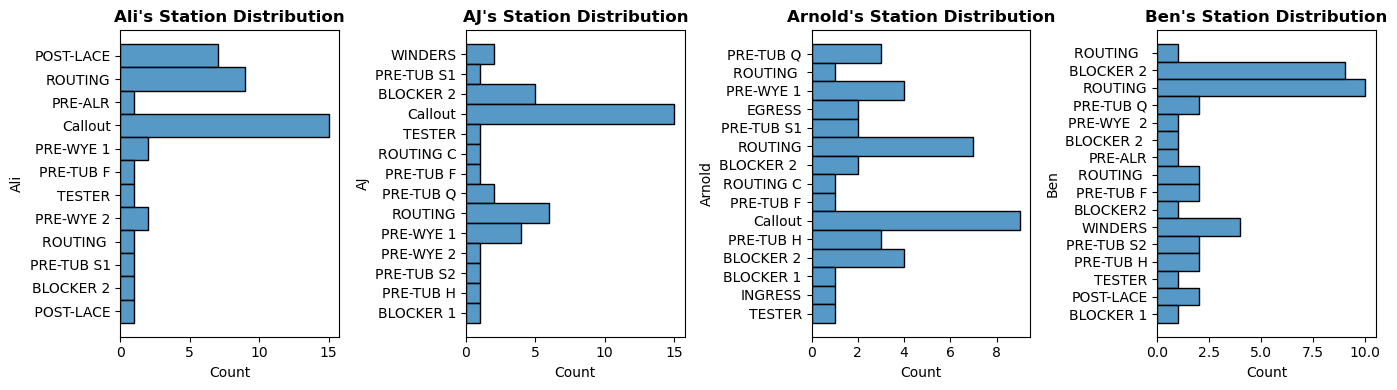

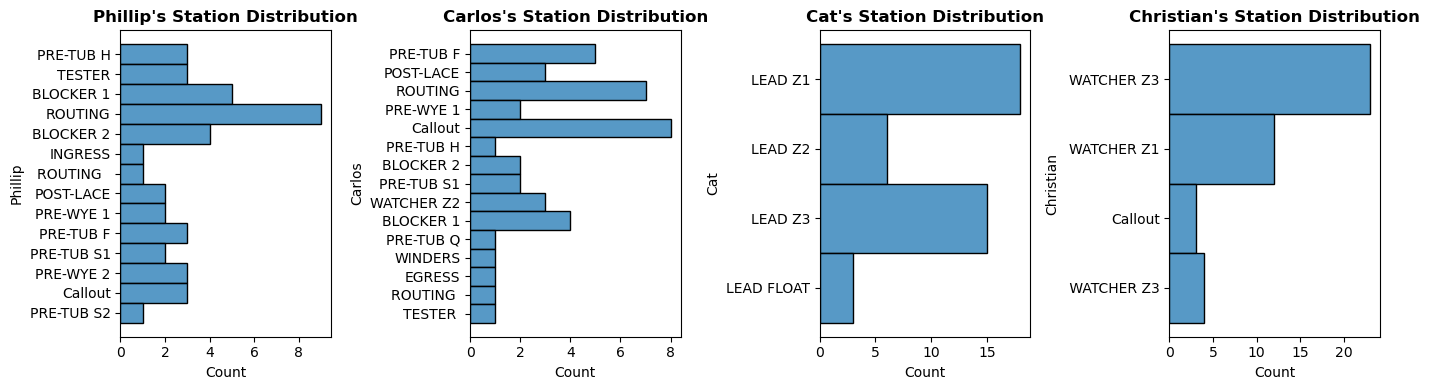

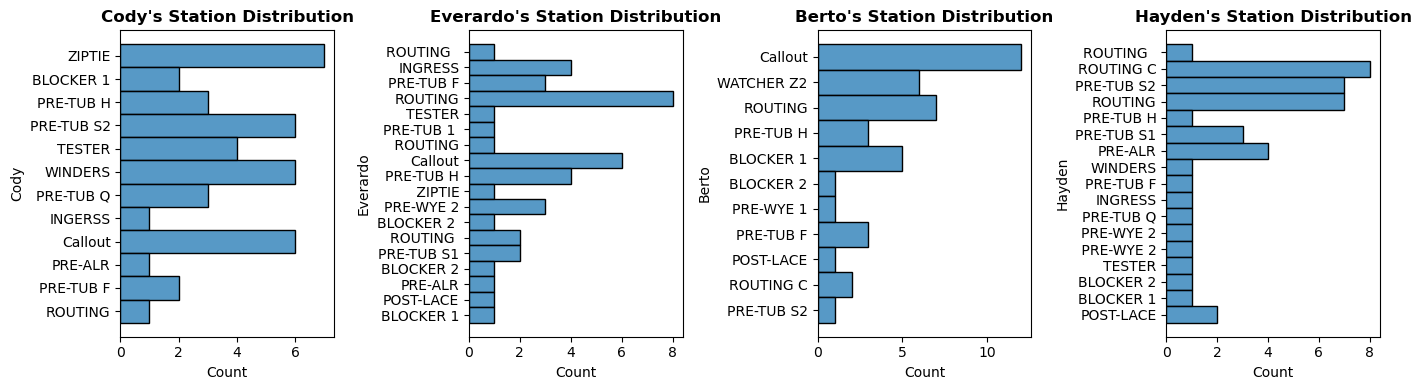

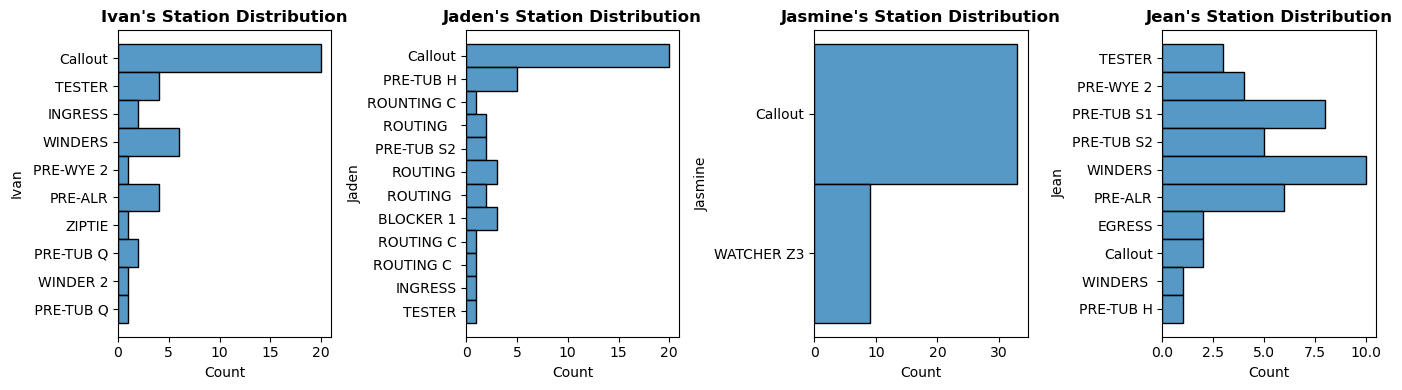

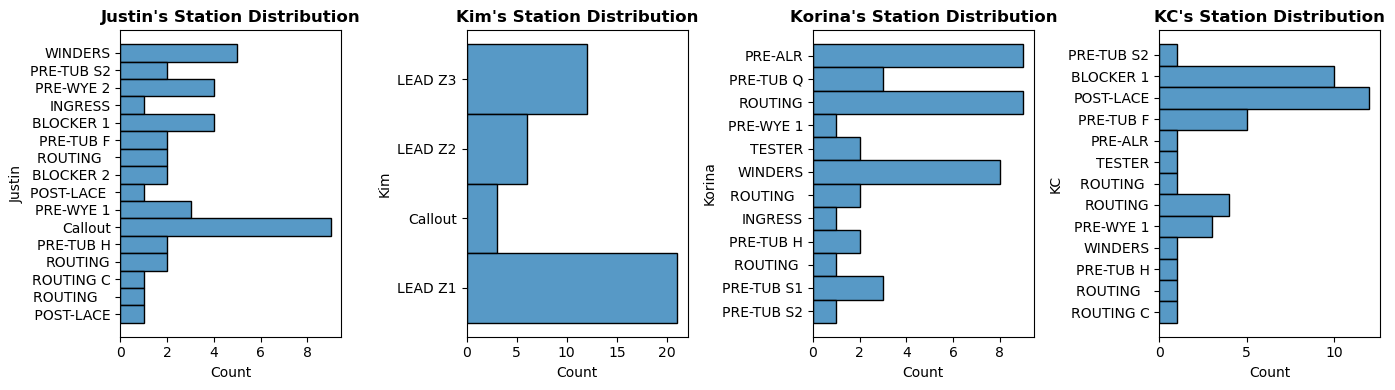

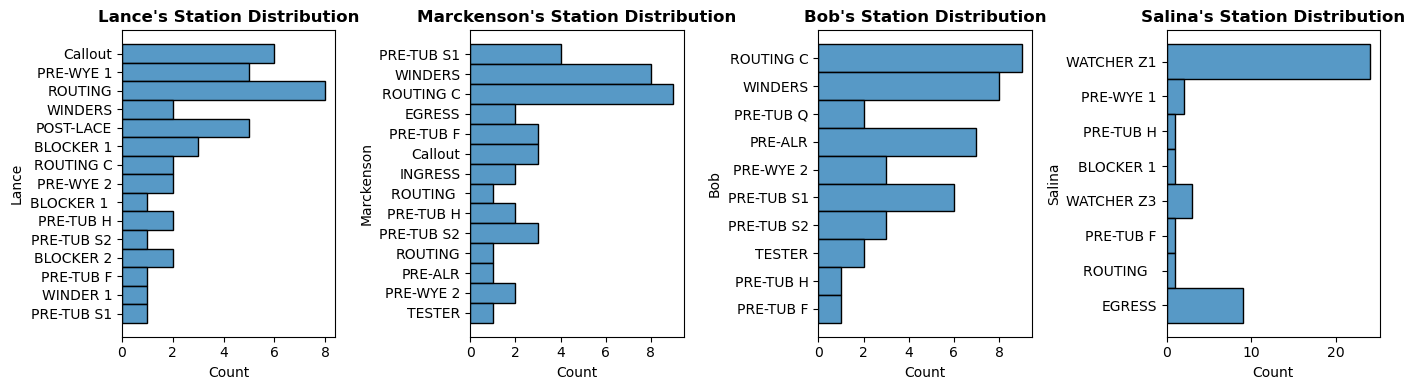

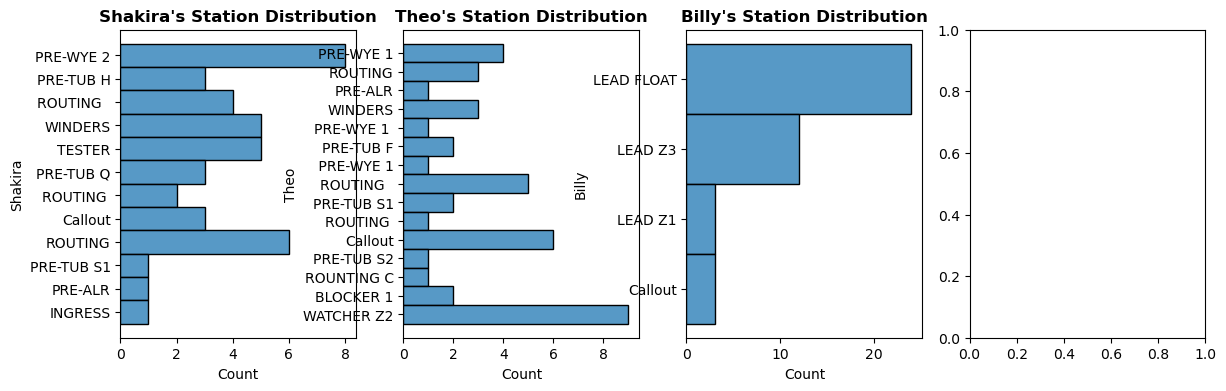

In [98]:
# Display Histogram per Name
col_ax = 0
row_limit = 25
counter = 0
fig, axes = plt.subplots(ncols=4, figsize=(14,4))
# Iterate to all features and display Historgram
for col in df.columns:
    # Set Historgram 
    ax=sns.histplot(data=df, y=col, ax=axes[col_ax])
    axes[col_ax].set_title(col+"'s Station Distribution", fontweight="bold")
    
    # Display every 2 cols and set new fig
    if col_ax == 3 and counter != row_limit:
        fig.tight_layout()
        fig, axes = plt.subplots(ncols=4, figsize=(14,4))
        col_ax = 0
        counter += 1
    else:
        col_ax += 1